In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [5]:
 df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [6]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [7]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [8]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [9]:
x=df.drop('FWI',axis=1)
y=df['FWI']

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)


In [11]:
 x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


In [12]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
                

    return col_corr

In [13]:
corr_features=correlation(x_train, 0.85)

In [14]:
x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)
x_train.shape,x_test.shape

((182, 9), (61, 9))

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

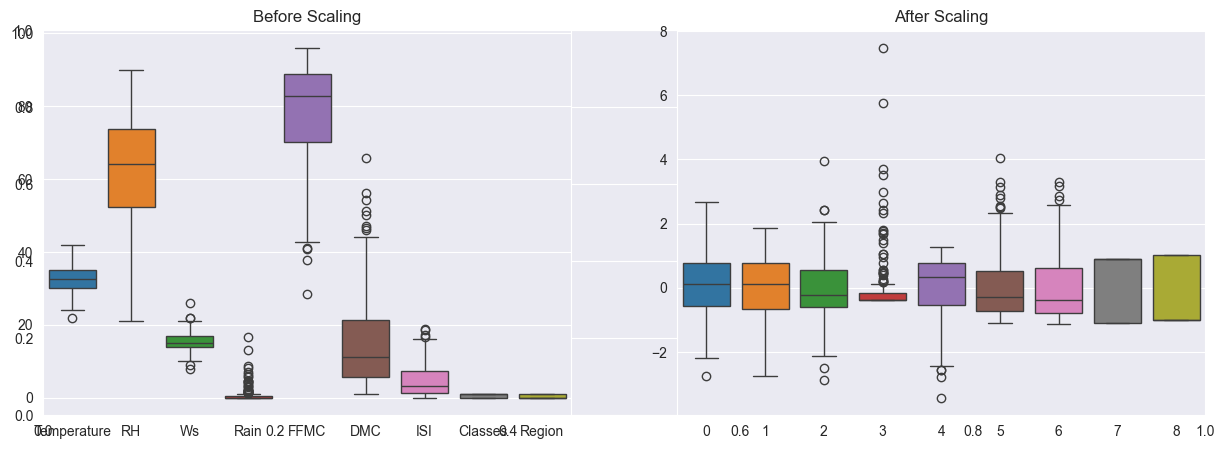

In [16]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title('Before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data=x_train_scaled)
plt.title('After Scaling')
plt.show()

MAE: 0.5468236465249978
MSE: 0.674276687379158
RMSE: 0.8211435242265253
R2 Score: 0.9847657384266951


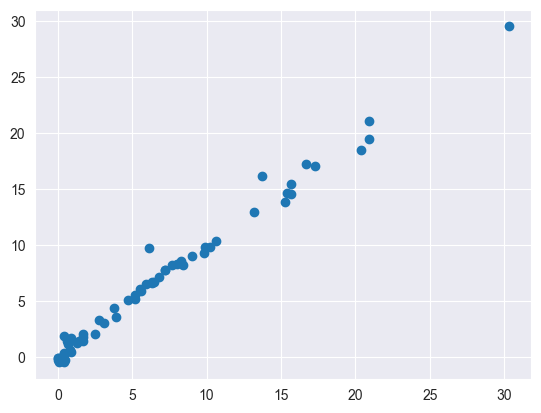

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
lr=LinearRegression()
lr.fit(x_train_scaled,y_train)
y_pred=lr.predict(x_test_scaled)
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2 Score:',r2_score(y_test,y_pred))
plt.scatter(y_test,y_pred)







MAE: 1.133175994914409
MSE: 2.2483458918974772
RMSE: 1.4994485292591664
R2 Score: 0.9492020263112388


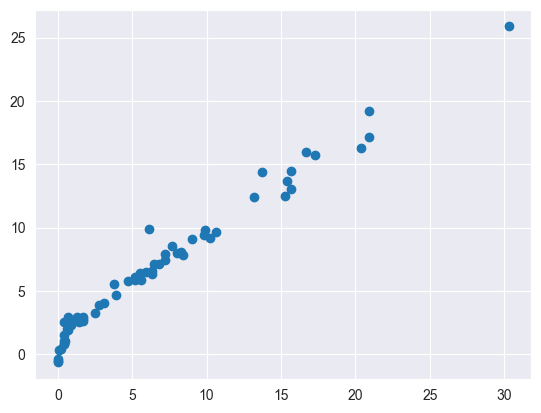

In [18]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
lasso=Lasso()
lasso.fit(x_train_scaled,y_train)
y_pred=lasso.predict(x_test_scaled)
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2 Score:',r2_score(y_test,y_pred))
plt.scatter(y_test,y_pred)




MAE: 0.5642305340105715
MSE: 0.6949198918152096
RMSE: 0.8336185529456561
R2 Score: 0.9842993364555512


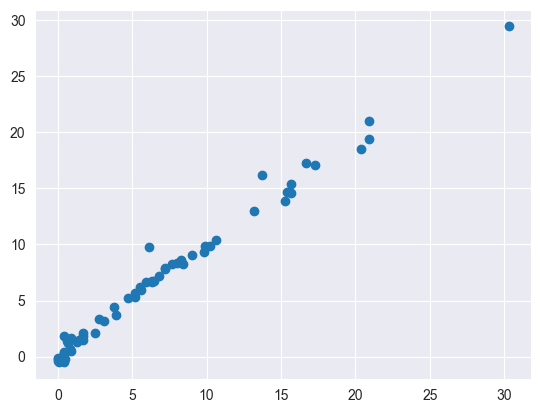

In [19]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
ridge=Ridge()
ridge.fit(x_train_scaled,y_train)
y_pred=ridge.predict(x_test_scaled)
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2 Score:',r2_score(y_test,y_pred))
plt.scatter(y_test,y_pred)




MAE: 1.8822353634896005
MSE: 5.5172511010252245
RMSE: 2.3488829474933874
R2 Score: 0.8753460589519703


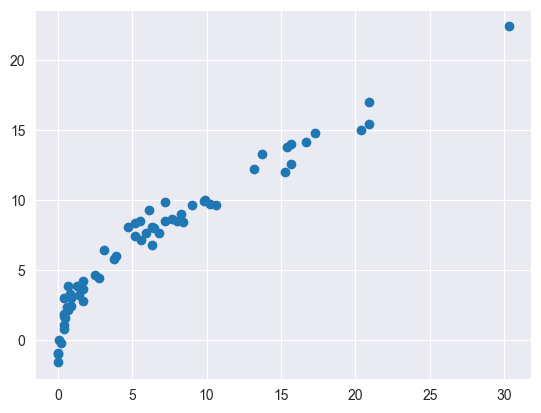

In [20]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
elastic=ElasticNet()
elastic.fit(x_train_scaled,y_train)
y_pred=elastic.predict(x_test_scaled)
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2 Score:',r2_score(y_test,y_pred))
plt.scatter(y_test,y_pred)




In [21]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(x_train_scaled,y_train)

LassoCV(cv=5)

Mean absolute error 0.619970115826343
R2 Score 0.9820946715928275


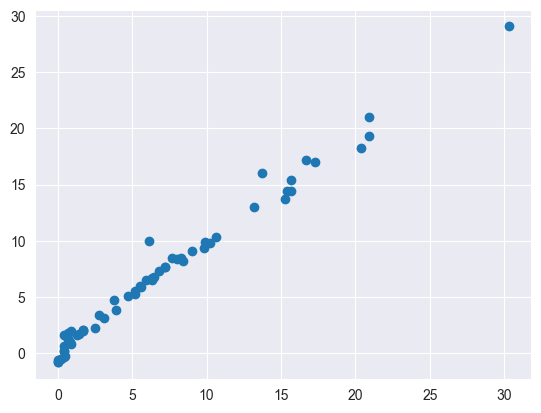

In [22]:
y_pred=lassocv.predict(x_test_scaled)
plt.scatter(y_test,y_pred)

mae= mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print ("R2 Score", score)

In [23]:
lassocv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

Mean absolute error 0.5642305340105715
R2 Score 0.9842993364555512


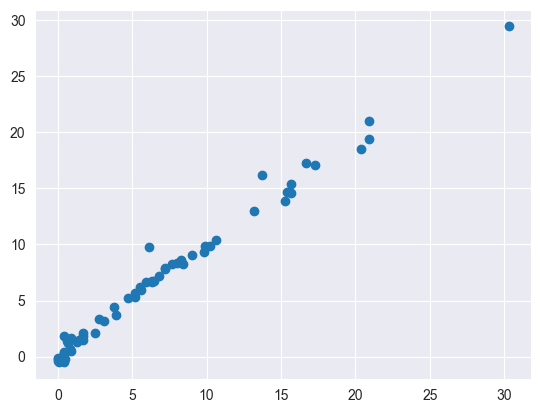

In [24]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(x_train_scaled,y_train)
y_pred=ridgecv.predict(x_test_scaled)
plt.scatter(y_test,y_pred)
mae= mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print ("R2 Score", score)


In [25]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

Mean absolute error 0.6575946731430898
R2 Score 0.9814217587854941


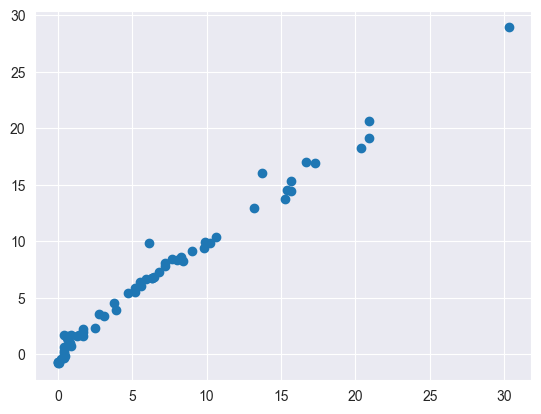

In [26]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(x_train_scaled,y_train)
y_pred=elasticcv.predict(x_test_scaled)
plt.scatter(y_test,y_pred)
mae= mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print ("R2 Score", score)


In [28]:
scaler

StandardScaler()

In [29]:
ridge

Ridge()

In [30]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('model.pkl','wb'))